In [1]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.colors import LogNorm
from itertools import zip_longest
from IPython.display import HTML, display
from visualization.animation import TrajectoryAnimation, TrajectoryAnimation3D
from visualization.render import plot_contour, plot_3d_surface


(50, 50)


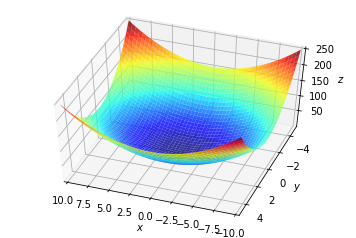

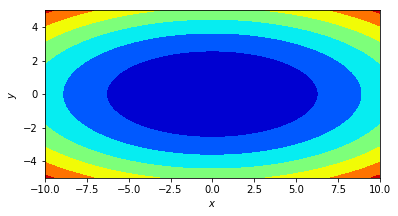

In [5]:
A = np.array([[1, 0],
              [0, 6]])

f = lambda w1, w2: w1**2 * A[0, 0] + 2*w1*w2*A[0, 1] + w2**2 * A[1, 1]

xlim = 10
ylim = 5
w1, w2 = np.meshgrid(np.linspace(-xlim, xlim), np.linspace(-ylim, ylim))
f_val = f(w1, w2)
_ = plot_3d_surface(w1, w2, f_val, 10, 5)

_ = plot_contour(w1, w2, f_val, 10, 5)

In [7]:
from first_order_optimizer import SGD, MomentumSGD, AdaGrad, RMSProp, Adam

def quadratic_form(w, compute_grad=True):
    f_val = w.T @ A @ w
    if compute_grad:
        grad = (2*A) @ w
        res = (f_val, grad)
    else:
        res = f_val
    return res

# 2D visualization
w_init = np.array([[-7.5],[-4]])
ws, fs = SGD(quadratic_form, w_init, eta=0.15, steps=20)

fig, ax = plot_contour(w1, w2, f_val, 10, 5, for_animation=True)
anim = TrajectoryAnimation([ws], labels=['SGD'], fig=fig, ax=ax, interval=500)
display(HTML(anim.to_html5_video()))

# 3D visualization
fig, ax = plot_3d_surface(w1, w2, f_val, 10, 5, for_animation=True)
anim3d = TrajectoryAnimation3D([ws], zpaths=[fs], labels=['SGD'], fig=fig, ax=ax, interval=500)
HTML(anim3d.to_html5_video())

In [8]:
def quadratic_form_noised_grad(w, compute_grad=True):
    f_val = w.T @ A @ w
    if compute_grad:
        grad = (2*A) @ w
        grad += np.random.normal(scale=np.sqrt(grad.T @ grad)/3)
        res = (f_val, grad)
    else:
        res = f_val
    return res

w_init = np.array([[-7.5],[-4]])
ws, fs = SGD(quadratic_form_noised_grad, w_init, eta=0.15, steps=20)

fig, ax = plot_contour(w1, w2, f_val, 10, 5, for_animation=True)
anim = TrajectoryAnimation([ws], labels=['SGD'], fig=fig, ax=ax, interval=500)
display(HTML(anim.to_html5_video()))

fig, ax = plot_3d_surface(w1, w2, f_val, 10, 5, for_animation=True)
anim3d = TrajectoryAnimation3D([ws], zpaths=[fs], labels=['SGD'], fig=fig, ax=ax, interval=500)
display(HTML(anim3d.to_html5_video()))

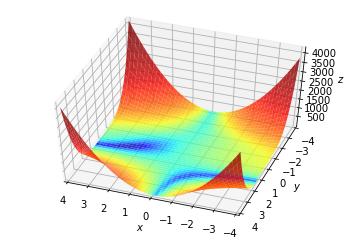

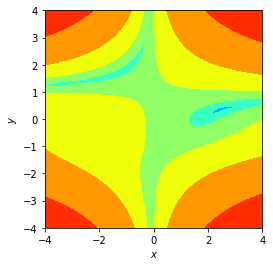

In [9]:
from model_zoo import beale
xlim = 4
ylim = 4
w1, w2 = np.meshgrid(np.linspace(-xlim, xlim), np.linspace(-ylim, ylim))
f_val = beale([w1, w2])

_ = plot_3d_surface(w1, w2, f_val, xlim, ylim, norm=LogNorm())
_ = plot_contour(w1, w2, f_val, xlim, ylim, norm=LogNorm())

In [10]:
w_init = np.array([[-1.5],[2.6]])
ws_nes, fs_nes = MomentumSGD(beale, w_init, eta=0.005, steps=200, momentum=0.9, nesterov=True)
ws_m, fs_m = MomentumSGD(beale, w_init, eta=0.005, steps=200, momentum=0.9)
ws_s, fs_s = SGD(beale, w_init, eta=0.005, steps=200)


fig, ax = plot_contour(w1, w2, f_val, xlim, ylim, for_animation=True, norm=LogNorm())
anim = TrajectoryAnimation([ws_s, ws_m, ws_nes], 
                           labels=['SGD', 'SGD+Mom', 'SGD+Nes'], 
                           fig=fig, ax=ax, interval=100)
display(HTML(anim.to_html5_video()))


fig, ax = plot_3d_surface(w1, w2, f_val, xlim, ylim, for_animation=True, norm=LogNorm())
anim = TrajectoryAnimation3D([ws_s, ws_m, ws_nes], [fs_s, fs_m, fs_nes],
                             labels=['SGD', 'SGD+Mom', 'SGD+Nes'], 
                             fig=fig, ax=ax, interval=100)
display(HTML(anim.to_html5_video()))